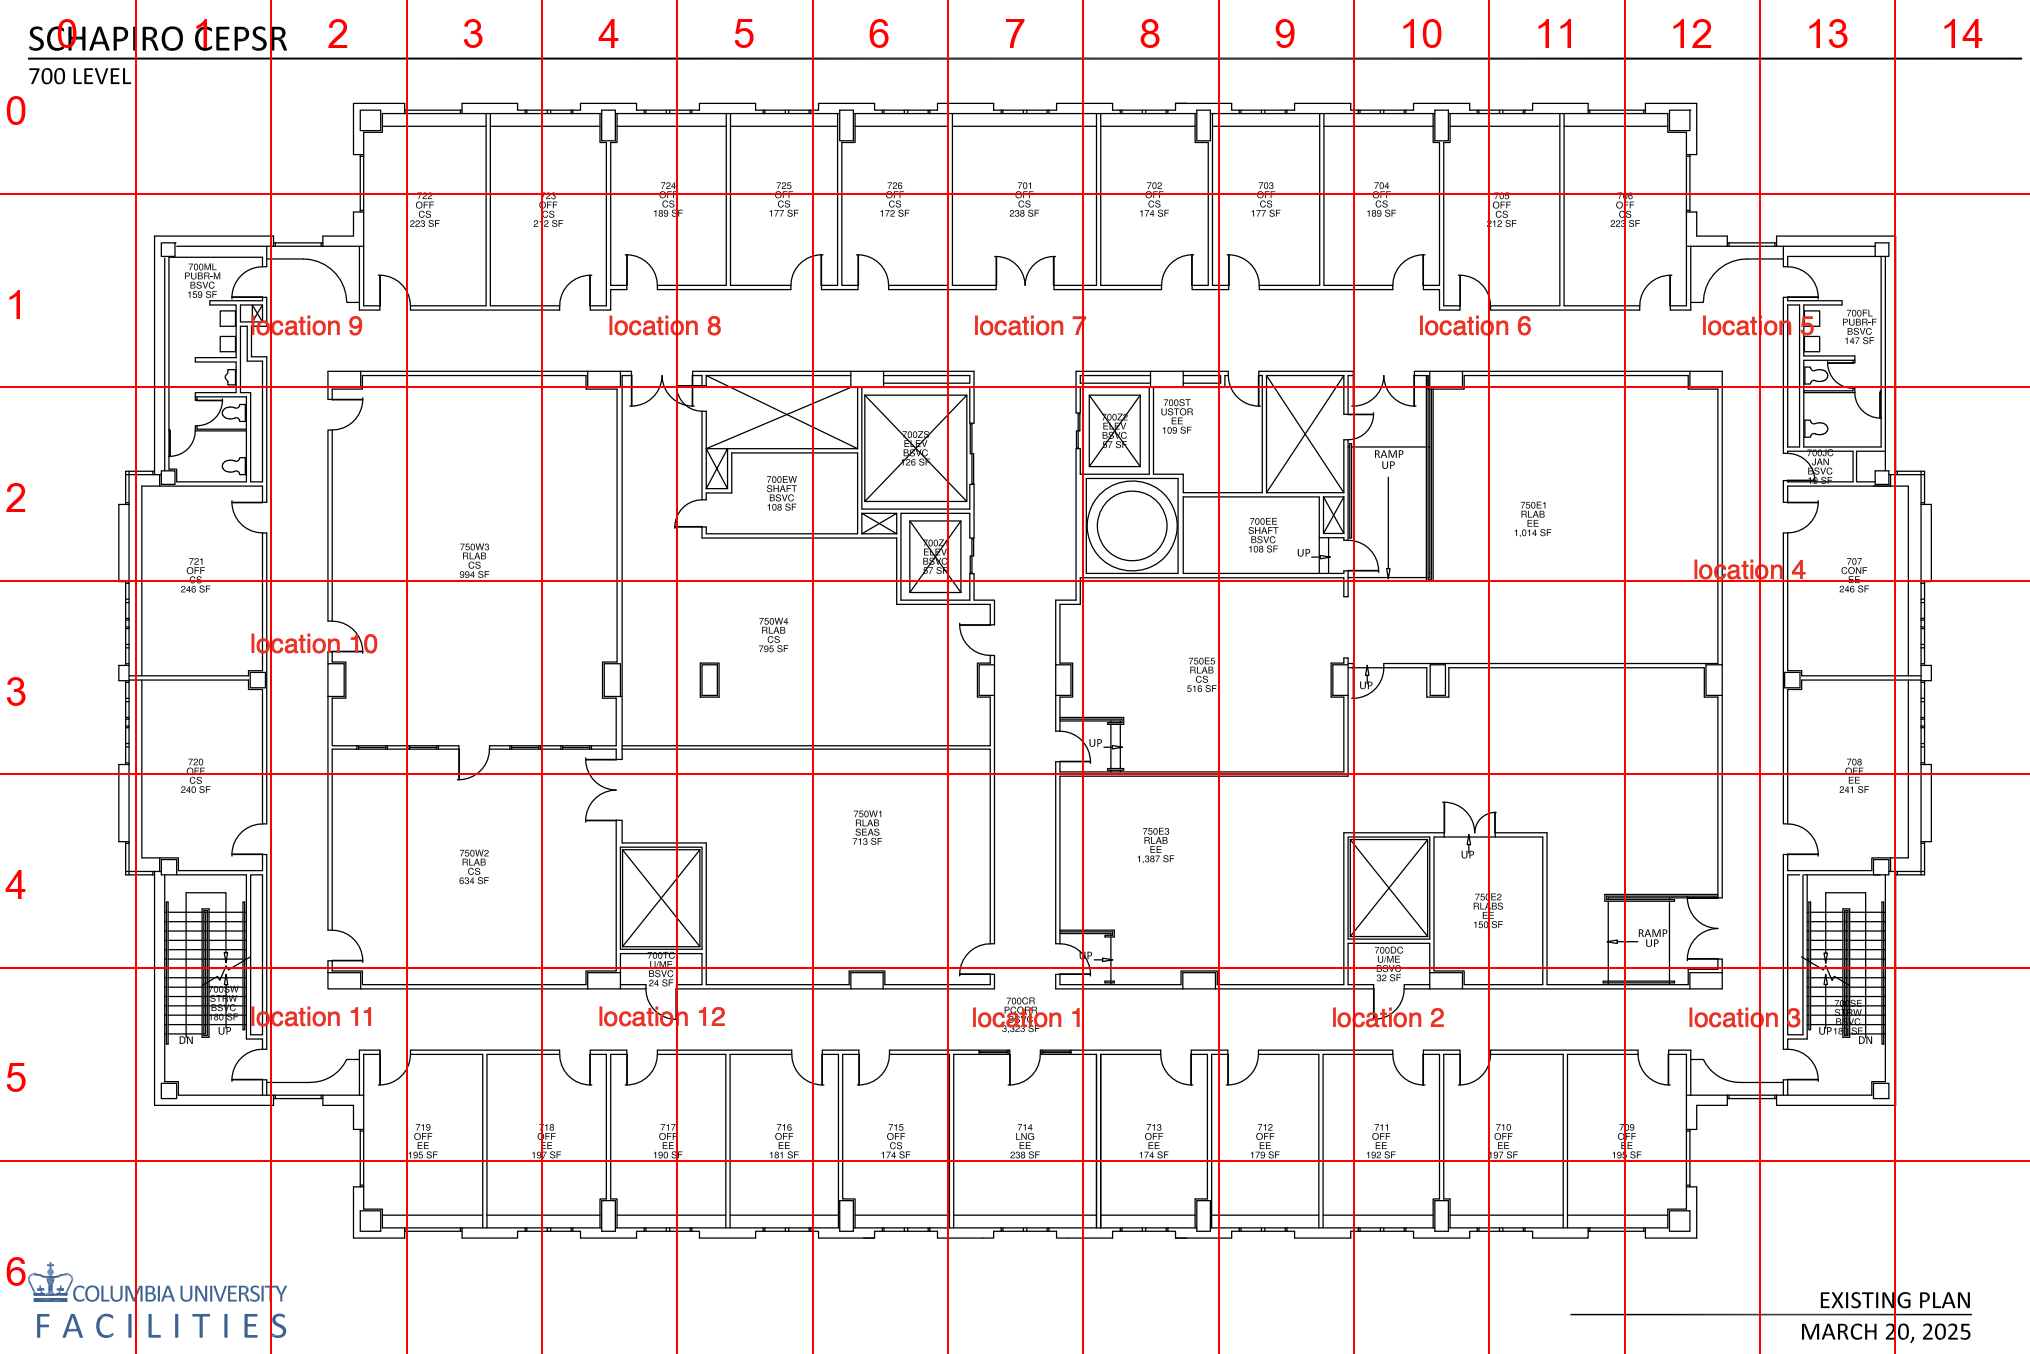

In [19]:
from PIL import Image, ImageDraw, ImageFont

def overlay_grid_with_labels(image_path: str, num_rows: int, num_cols: int,
                             font_path: str = "/Library/Fonts/Arial Unicode.ttf",
                             font_size: int = 40,
                             line_color: tuple=(255,0,0,255),
                             line_width: int=2):
    """
    Overlays a grid on the original image with row/column labels using a TrueType font.
    Returns a new PIL Image with the grid and labels drawn on it.
    """
    # Load image
    img = Image.open(image_path).convert("RGBA")
    w, h = img.size
    cell_w = w / num_cols
    cell_h = h / num_rows
    
    # Prepare drawing layers
    grid_layer = Image.new("RGBA", img.size, (0,0,0,0))
    draw = ImageDraw.Draw(grid_layer)
    
    # Load a TrueType font to respect font_size
    try:
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        font = ImageFont.load_default()
        print(f"Warning: cannot load font at {font_path}, using default (size ignored).")
    
    # Draw grid lines
    for i in range(1, num_cols):
        x = int(i * cell_w)
        draw.line([(x, 0), (x, h)], fill=line_color, width=line_width)
    for j in range(1, num_rows):
        y = int(j * cell_h)
        draw.line([(0, y), (w, y)], fill=line_color, width=line_width)
    
    # Draw column labels at top
    for i in range(num_cols):
        x_center = int((i + 0.5) * cell_w)
        text = str(i)
        bbox = draw.textbbox((0, 0), text, font=font)
        text_width = bbox[2] - bbox[0]
        draw.text((x_center - text_width // 2, 5), text, fill=line_color, font=font)
    
    # Draw row labels at left
    for j in range(num_rows):
        y_center = int((j + 0.5) * cell_h)
        text = str(j)
        bbox = draw.textbbox((0, 0), text, font=font)
        text_height = bbox[3] - bbox[1]
        draw.text((5, y_center - text_height // 2), text, fill=line_color, font=font)
    
    # Composite and return
    combined = Image.alpha_composite(img, grid_layer)
    return combined

# Usage: specify a valid TTF font and desired font_size
image_path = 'CEPSR - Floor 7/Floorplan/floorplan_1.png'

labeled_grid = overlay_grid_with_labels(
    image_path,
    num_rows=7,
    num_cols=15,
    font_size=40
)

# save the labeled grid image
labeled_grid.save('CEPSR - Floor 7/Floorplan/labeled_grid.png', format='PNG')

labeled_grid
